# <b>Final Report - NBA Winner Predicting Model</b>

#### <b> Team Members:</b> Spencer Kim, Alfonso Garcia, Brett Graybill, Seungmi Lee, Rohan Misra

## Introduction/Background:
----------------------------------
With basketball being a popular pastime in the United States, fans spend much time on  supplementary activities such as betting. Sports betting allows fans to engage at a deeper level - leading them to wager money and track stats, storylines, and performances at a game-by-game level. 

The team plans to explore applications of machine learning to sports betting as it relates to the NBA season. Similar efforts in the past have successfully combined machine learning concepts such as convolutional neural networks with modern portfolio theory to maximize predictive power,  as well as expected profit on NBA betting (Hubáček, 2019). Other examples in sports such as tennis have seen the use of ensemble methods incorporating models such as logistic regression, neural networks, random forests, GBM, and SVM maximize expected return (Wilkens, 2021).

The dataset that we will use consists of data from each of the regular and postseason NBA games from the 2007-2008 to the 2021-2022 seasons (Skompinski, 2021). For each game, there are several attributes (100+) detailing statistics for each of the teams playing, in addition to betting data. 

## Problem Definition:
----------------------------------
One of the most common forms of sports betting is on the winner of a given matchup. The simplicity and frequency of a binary outcome - win or loss - drives popularity among all levels of bettors. Therefore, the scope of this project will focus on analyzing winners of individual match-ups throughout the season and postseason.

While predicting regular season wins would be a useful tool, we find it more compelling to make forecasts on the winners of playoff matchups, based on regular season data. Teams are often criticized for being “regular season” performers - lacking an “intangible” gear to enter when the heightened postseason atmosphere materializes. More attention and prominence is associated with betting in the playoffs, and oftentimes greater payouts - further solidifying the exercise as a worthwhile one. 

## Methods:
----------------------------------
Using our aforementioned NBA game data, we plan on using multiple methods in order to build our predictive model. Namely, we will create a <font color = '419CFF'>feed-forward neural network</font> and use a brute force strategy in order to analyze statistics from previous matches and generate a prediction. Additionally, we want to approach the <font color = '419CFF'>data with PCA (Preprocessing Analysis)</font> in order to find metrics for optimal predicted value for game winners. We may also experiment with player datasets in order to refine the model

In [28]:
# imports
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, metrics
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, roc_auc_score, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from keras import regularizers

In [29]:
# Load the data that NBA games from the 2007-2008 to 2021-2022 seasons
df = pd.read_csv('DatasetFinal.csv')
df


,Unnamed: 0.1,Unnamed: 0,Post-Season,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,Date,TEAM_NAME.1,GP.1,W.1,L.1,W_PCT.1,MIN.1,FGM.1,FGA.1,FG_PCT.1,FG3M.1,FG3A.1,FG3_PCT.1,FTM.1,FTA.1,FT_PCT.1,OREB.1,DREB.1,REB.1,AST.1,TOV.1,STL.1,BLK.1,BLKA.1,PF.1,PFD.1,PTS.1,PLUS_MINUS.1,GP_RANK.1,W_RANK.1,L_RANK.1,W_PCT_RANK.1,MIN_RANK.1,FGM_RANK.1,FGA_RANK.1,FG_PCT_RANK.1,FG3M_RANK.1,FG3A_RANK.1,FG3_PCT_RANK.1,FTM_RANK.1,FTA_RANK.1,FT_PCT_RANK.1,OREB_RANK.1,DREB_RANK.1,REB_RANK.1,AST_RANK.1,TOV_RANK.1,STL_RANK.1,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Date.1,Score,Home-Team-Win,OU,OU-Cover
0,0,0,0,Philadelphia 76ers,2,1,1,0.500,48.0,36.5,82.5,0.442,4.0,14.0,0.286,19.5,28.5,0.684,16.5,34.0,50.5,20.0,19.0,6.0,8.0,5.5,19.5,21.5,96.5,1.0,2,8,12,12,5,18,14,18,26,26,26,14,13,21,3,12,5,18,26,19,4,12,7,20,20,15,2007-11-03,New Jersey Nets,2,1,1,0.500,50.5,29.0,75.0,0.387,7.5,22.0,0.341,25.0,29.5,0.847,11.0,30.0,41.0,21.5,18.0,6.5,6.5,4.0,26.5,24.5,90.5,-14.0,2,8,12,12,1,30,28,29,9,7,17,4,12,3,13,20,20,10,23,17,7,7,24,9,28,27,2007-11-03,181,0,186.5,0
1,1,1,0,Washington Wizards,2,0,2,0.000,50.5,32.0,89.5,0.358,3.0,18.0,0.167,29.5,40.0,0.738,18.5,32.0,50.5,13.0,19.0,6.0,5.5,6.0,26.5,28.5,96.5,-14.5,2,20,23,20,1,28,4,30,29,16,30,2,2,14,1,16,5,30,26,19,15,13,24,2,20,28,2007-11-03,Orlando Magic,2,1,1,0.500,48.0,31.5,75.0,0.420,10.0,20.0,0.500,24.0,34.0,0.706,9.5,28.5,38.0,15.5,11.0,3.5,5.5,6.0,21.0,25.5,97.0,-2.5,2,8,12,12,5,29,28,21,3,13,3,7,5,19,21,23,25,28,1,29,15,13,10,6,19,16,2007-11-03,176,0,199.0,0
2,2,2,0,Memphis Grizzlies,1,0,1,0.000,48.0,38.0,80.0,0.475,10.0,23.0,0.435,15.0,20.0,0.750,6.0,36.0,42.0,21.0,14.0,5.0,6.0,5.0,19.0,17.0,101.0,-3.0,24,20,12,20,5,11,20,9,3,5,10,21,23,12,29,7,18,11,8,25,10,9,5,28,15,17,2007-11-03,Indiana Pacers,2,2,0,1.000,50.5,35.5,87.5,0.406,10.0,22.0,0.455,22.0,28.5,0.772,13.5,39.5,53.0,21.0,15.5,10.5,9.5,7.5,25.5,22.5,103.0,5.5,2,2,1,1,1,21,6,25,3,7,8,10,13,8,11,1,1,11,15,4,1,22,22,15,10,11,2007-11-03,232,0,211.5,1
3,3,3,0,Milwaukee Bucks,2,0,2,0.000,48.0,37.5,87.0,0.431,4.5,15.0,0.300,11.5,18.0,0.639,16.0,30.0,46.0,18.0,17.0,5.5,6.0,8.0,30.0,22.5,91.0,-11.0,2,20,23,20,5,14,7,20,25,21,24,28,27,27,4,20,10,26,20,23,10,24,30,15,26,24,2007-11-03,Chicago Bulls,2,0,2,0.000,50.5,35.5,91.0,0.390,7.5,23.5,0.319,15.5,22.5,0.689,15.5,25.0,40.5,20.5,16.0,9.0,5.0,7.0,26.5,26.5,94.0,-10.0,2,20,23,20,1,21,2,28,9,4,21,20,19,20,5,29,22,16,16,9,19,20,24,4,23,23,2007-11-03,150,1,193.5,0
4,4,4,0,Houston Rockets,2,2,0,1.000,48.0,36.5,77.0,0.474,5.5,19.0,0.289,22.0,30.5,0.721,10.5,34.5,45.0,21.0,16.5,9.5,6.5,3.5,27.0,24.5,100.5,6.5,2,2,1,1,5,18,25,10,23,14,25,10,10,17,17,9,13,11,18,7,7,5,28,9,18,9,2007-11-03,Portland Trail Blazers,2,0,2,0.000,48.0,39.5,80.5,0.491,6.0,13.0,0.462,10.0,13.5,0.741,8.5,26.5,35.0,19.0,15.0,2.5,2.5,3.5,18.5,19.5,95.0,-14.5,2,20,23,20,5,7,18,4,20,27,6,29,30,13,25,28,29,23,10,30,29,5,2,22,22,28,2007-11-03,169,1,203.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18838,18838,18838,1,Golden State Warriors,82,53,29,0.646,48.1,40.5,86.4,0.469,14.3,39.4,0.364,15.6,20.3,0.769,9.8,35.7,45.5,27.1,14.9,8.8,4.5,3.9,21.0,18.0,111.0,5.5,1,3,3,3,24,17,21,10,3,3,8,26,26,17,20,2,7,5,29,4,18,2,27,29,15,5,2022-06-06,Boston Celtics,82,51,31,0.622,48.5,40.7

### Data cleaning

In order to clean our data, we made several modifications. As the table includes game data from the 2007-2008 to the 2021-2022 NBA season across both regular season and playoff matchups, there are nearly 20,000 rows including over 100 fields. Save for the last four columns, most fields appear in duplicate - this is because they are shown for both teams (e.g., GP - Games Played, FGM - Field Goals Made, REB - Rebounds, etc.). 

In order to distinguish between fields corresponding to the home team versus the away team, we concatenate a “.1” to the last 54 fields to designate the away team. While our dataset is relatively robust, we did see an opportunity to introduce some labels: namely, a binary “playoff” field.. However, the distinction between playoff and regular season games is not made clear in the data, so we introduced this column to the dataset. Additionally, we find it potentially valuable to add win/loss streak field(s) to demonstrate the effect of momentum on a team’s success. We have not yet implemented this attribute, but plan to for the final iteration.

We also removed the first column (index) from the dataset, as it is made redundant by the default indexing of the pandas dataframe we work with. Furthermore, we removed the Date column - the reasons for this are twofold. One, the date column intuitively should have little impact on the winner of a game, as the effect of progression through the season (e.g., fatigue, push for playoff seeding, tanking) should be captured by Games Played and Win/Loss and two, is formatted such that it would be difficult to work with and incorporate into our Principal Component Analysis. Before executing the PCA, however, we needed to encode two categorical variables (Team_Name and Team_Name.1), instead denoting each team with an integer value from 1-30. 

In [30]:
df.columns
df.drop(columns=df.columns[0:2],inplace=True)

# exclude dates
df = df.drop(columns=['Date.1', 'Date'])

# encoding the team names
enc = preprocessing.LabelEncoder()
df[['TEAM_NAME', 'TEAM_NAME.1']] = df[['TEAM_NAME', 'TEAM_NAME.1']].apply(enc.fit_transform)
df

,Post-Season,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,TEAM_NAME.1,GP.1,W.1,L.1,W_PCT.1,MIN.1,FGM.1,FGA.1,FG_PCT.1,FG3M.1,FG3A.1,FG3_PCT.1,FTM.1,FTA.1,FT_PCT.1,OREB.1,DREB.1,REB.1,AST.1,TOV.1,STL.1,BLK.1,BLKA.1,PF.1,PFD.1,PTS.1,PLUS_MINUS.1,GP_RANK.1,W_RANK.1,L_RANK.1,W_PCT_RANK.1,MIN_RANK.1,FGM_RANK.1,FGA_RANK.1,FG_PCT_RANK.1,FG3M_RANK.1,FG3A_RANK.1,FG3_PCT_RANK.1,FTM_RANK.1,FTA_RANK.1,FT_PCT_RANK.1,OREB_RANK.1,DREB_RANK.1,REB_RANK.1,AST_RANK.1,TOV_RANK.1,STL_RANK.1,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Score,Home-Team-Win,OU,OU-Cover
0,0,26,2,1,1,0.500,48.0,36.5,82.5,0.442,4.0,14.0,0.286,19.5,28.5,0.684,16.5,34.0,50.5,20.0,19.0,6.0,8.0,5.5,19.5,21.5,96.5,1.0,2,8,12,12,5,18,14,18,26,26,26,14,13,21,3,12,5,18,26,19,4,12,7,20,20,15,20,2,1,1,0.500,50.5,29.0,75.0,0.387,7.5,22.0,0.341,25.0,29.5,0.847,11.0,30.0,41.0,21.5,18.0,6.5,6.5,4.0,26.5,24.5,90.5,-14.0,2,8,12,12,1,30,28,29,9,7,17,4,12,3,13,20,20,10,23,17,7,7,24,9,28,27,181,0,186.5,0
1,0,34,2,0,2,0.000,50.5,32.0,89.5,0.358,3.0,18.0,0.167,29.5,40.0,0.738,18.5,32.0,50.5,13.0,19.0,6.0,5.5,6.0,26.5,28.5,96.5,-14.5,2,20,23,20,1,28,4,30,29,16,30,2,2,14,1,16,5,30,26,19,15,13,24,2,20,28,25,2,1,1,0.500,48.0,31.5,75.0,0.420,10.0,20.0,0.500,24.0,34.0,0.706,9.5,28.5,38.0,15.5,11.0,3.5,5.5,6.0,21.0,25.5,97.0,-2.5,2,8,12,12,5,29,28,21,3,13,3,7,5,19,21,23,25,28,1,29,15,13,10,6,19,16,176,0,199.0,0
2,0,16,1,0,1,0.000,48.0,38.0,80.0,0.475,10.0,23.0,0.435,15.0,20.0,0.750,6.0,36.0,42.0,21.0,14.0,5.0,6.0,5.0,19.0,17.0,101.0,-3.0,24,20,12,20,5,11,20,9,3,5,10,21,23,12,29,7,18,11,8,25,10,9,5,28,15,17,12,2,2,0,1.000,50.5,35.5,87.5,0.406,10.0,22.0,0.455,22.0,28.5,0.772,13.5,39.5,53.0,21.0,15.5,10.5,9.5,7.5,25.5,22.5,103.0,5.5,2,2,1,1,1,21,6,25,3,7,8,10,13,8,11,1,1,11,15,4,1,22,22,15,10,11,232,0,211.5,1
3,0,18,2,0,2,0.000,48.0,37.5,87.0,0.431,4.5,15.0,0.300,11.5,18.0,0.639,16.0,30.0,46.0,18.0,17.0,5.5,6.0,8.0,30.0,22.5,91.0,-11.0,2,20,23,20,5,14,7,20,25,21,24,28,27,27,4,20,10,26,20,23,10,24,30,15,26,24,5,2,0,2,0.000,50.5,35.5,91.0,0.390,7.5,23.5,0.319,15.5,22.5,0.689,15.5,25.0,40.5,20.5,16.0,9.0,5.0,7.0,26.5,26.5,94.0,-10.0,2,20,23,20,1,21,2,28,9,4,21,20,19,20,5,29,22,16,16,9,19,20,24,4,23,23,150,1,193.5,0
4,0,11,2,2,0,1.000,48.0,36.5,77.0,0.474,5.5,19.0,0.289,22.0,30.5,0.721,10.5,34.5,45.0,21.0,16.5,9.5,6.5,3.5,27.0,24.5,100.5,6.5,2,2,1,1,5,18,25,10,23,14,25,10,10,17,17,9,13,11,18,7,7,5,28,9,18,9,28,2,0,2,0.000,48.0,39.5,80.5,0.491,6.0,13.0,0.462,10.0,13.5,0.741,8.5,26.5,35.0,19.0,15.0,2.5,2.5,3.5,18.5,19.5,95.0,-14.5,2,20,23,20,5,7,18,4,20,27,6,29,30,13,25,28,29,23,10,30,29,5,2,22,22,28,169,1,203.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18838,1,10,82,53,29,0.646,48.1,40.5,86.4,0.469,14.3,39.4,0.364,15.6,20.3,0.769,9.8,35.7,45.5,27.1,14.9,8.8,4.5,3.9,21.0,18.0,111.0,5.5,1,3,3,3,24,17,21,10,3,3,8,26,26,17,20,2,7,5,29,4,18,2,27,29,15,5,1,82,51,31,0.622,48.5,40.7,87.4,0.466,13.2,37.1,0.356,17.0,20.9,0.816,10.5,35.5,46.1,24.8,13.6,7.2,5.8,4.6,18.5,19.4,111.8,7.3,1,6,6,6,2,13,18,15,8,9,14,14,24,2,11,4,5,14,13,19,2,11,5,20,12,2,195,1,212.5,0
18839,1,1,82,51,31,0.622,48.5,40.7,87.4,0.466,13.2,37.1,0.356,17.0,20.9,0.816,10.5,35.5,46.1,24.8,13.6,7.2,5.8,4.6,18.5,19.4,111.8,7.3,1,6,6,6,2,13,18,15,8,9,14,14,24,2,11,4,5,14,13,19,2,11,5,20,12,

In order to set up the PCA, we needed to further preprocess our data. To do so, we <font color = FFB141>standardized the data outside of the encoded team name</font> using the scikit-learn StandardScaler() method, which calculates a z-score to normalize each value. 

In [31]:
# standardize the data
scaler = preprocessing.StandardScaler()
df.loc[:, ~df.columns.isin(['TEAM_NAME', 'TEAM_NAME.1', 'Home-Team-Win'])] = scaler.fit_transform(df.loc[:, ~df.columns.isin(['TEAM_NAME', 'TEAM_NAME.1', 'Home-Team-Win'])])
pd.set_option('display.max_columns', None)
df

,Post-Season,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,TEAM_NAME.1,GP.1,W.1,L.1,W_PCT.1,MIN.1,FGM.1,FGA.1,FG_PCT.1,FG3M.1,FG3A.1,FG3_PCT.1,FTM.1,FTA.1,FT_PCT.1,OREB.1,DREB.1,REB.1,AST.1,TOV.1,STL.1,BLK.1,BLKA.1,PF.1,PFD.1,PTS.1,PLUS_MINUS.1,GP_RANK.1,W_RANK.1,L_RANK.1,W_PCT_RANK.1,MIN_RANK.1,FGM_RANK.1,FGA_RANK.1,FG_PCT_RANK.1,FG3M_RANK.1,FG3A_RANK.1,FG3_PCT_RANK.1,FTM_RANK.1,FTA_RANK.1,FT_PCT_RANK.1,OREB_RANK.1,DREB_RANK.1,REB_RANK.1,AST_RANK.1,TOV_RANK.1,STL_RANK.1,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Score,Home-Team-Win,OU,OU-Cover
0,-0.237112,26,-1.684315,-1.368008,-1.466677,-0.046255,-1.011219,-0.707016,-0.407518,-0.621131,-1.672326,-1.394144,-2.349628,0.709227,1.694739,-2.152713,3.942970,0.567243,2.841209,-0.920818,3.053921,-1.523315,3.192008,0.619164,-0.658358,0.447442,-0.929743,0.136055,-1.141731,-0.719371,-0.212995,-0.294941,-1.039994,0.307790,-0.189680,0.324150,1.238278,1.232355,1.240836,-0.157160,-0.278001,0.652995,-1.447565,-0.370527,-1.191321,0.303751,1.234957,0.425502,-1.298927,-0.363763,-0.972015,0.535330,0.549366,0.002502,20,-1.687317,-1.381122,-1.466342,-0.062977,6.536296,-3.771622,-2.234797,-3.414652,-0.434619,-0.332550,-0.472658,3.044221,2.011384,2.359817,0.225730,-1.049705,-0.889509,-0.325115,2.375883,-1.074764,1.634716,-1.040274,3.201855,2.145343,-1.793124,-2.635598,-1.134387,-0.705627,-0.205234,-0.283420,-1.527669,1.700067,1.433319,1.598699,-0.718621,-0.962606,0.211085,-1.315939,-0.393304,-1.428171,-0.290859,0.563352,0.549649,-0.603831,0.887215,0.191459,-0.949909,-0.929686,1.001551,-0.736910,1.481850,1.398772,-1.154642,0,-0.937742,-0.980049
1,-0.237112,34,-1.684315,-1.432666,-1.391912,-2.758043,6.490512,-2.532929,1.278868,-4.872798,-2.026456,-0.863886,-6.426255,4.981527,5.535196,-0.664518,5.290768,-0.233890,2.841209,-3.745270,3.053921,-1.523315,0.560961,1.171527,3.166770,4.446446,-0.929743,-2.702999,-1.141731,0.666844,1.052828,0.621091,-1.528895,1.461772,-1.339362,1.705861,1.583708,0.077321,1.701155,-1.543243,-1.544951,-0.154675,-1.677739,0.089100,-1.191321,1.679915,1.234957,0.425502,-0.034076,-0.248835,0.991031,-1.546490,0.549366,1.493426,25,-1.687317,-1.381122,-1.466342,-0.062977,-1.021857,-2.754641,-2.234797,-1.744681,0.454109,-0.598678,4.948056,2.618718,3.503699,-1.558520,-0.780603,-1.653157,-2.064819,-2.758332,-2.521764,-3.846852,0.564846,1.205498,0.174232,2.713104,-0.868588,-0.522177,-1.134387,-0.705627,-0.205234,-0.283420,-1.037618,1.584905,1.433319,0.679182,-1.409793,-0.271247,-1.406621,-0.969085,-1.200365,0.418330,0.629332,0.909407,1.126565,1.465104,-1.658707,1.572071,-0.026738,-0.237605,-0.616111,-1.084122,0.442852,0.132115,-1.376722,0,-0.359796,-0.980049
2,-0.237112,16,-1.725624,-1.432666,-1.466677,-2.758043,-1.011219,-0.098379,-1.009799,1.049166,0.452448,-0.201062,2.754719,-1.213308,-1.143860,-0.333808,-3.132971,1.368377,-0.481454,-0.517325,-0.424970,-2.438365,1.087170,0.066801,-0.931581,-2.123346,-0.290332,-0.596604,1.337486,0.666844,-0.212995,0.621091,-1.039994,-0.499998,0.500130,-0.712132,-1.410018,-1.193216,-0.600438,0.651389,0.873771,-0.385437,1.544701,-0.945061,0.307022,-0.499011,-0.850527,1.115723,-0.609008,-0.708545,-1.202962,1.460584,-0.027929,0.231874,12,-1.687317,-1.316067,-1.541316,2.672370,6.536296,-1.127471,0.795803,-2.453154,0.454109,-0.332550,3.413892,1.767712,1.679758,0.275596,1.902951,2.772158,3.811730,-0.527883,0.626723,2.621355,4.844328,2.889828,2.651378,1.009821,-0.015169,0.948030,-1.134387,-1.400286,-1.475335,-1.545970,-1.527669,0.663610,-1.107667,1.138941,-1.409793,-0.962606,-0.828869,-0.622231,-0.278009,-0.851140,-0.520907,-1.628331,-1.642633,-0.488890,-0.038575,-1.304205,-1.642288,0.800517,0.770456

### Pre-Processing

To conduct PCA, we drop five columns (Team_Name, Team_Name.1, Score, Home-Team-Win, and OU-Cover). We set our variance threshold to 95%, and using scikit-learn’s PCA object, we fit_transform our dataset to 39 principal components. Next, a boolean variable do_PCA is set to decide if we want to include PCA components or our raw components in model training. This is useful for comparing model performance between with and without PCA.

In [32]:
# PCA but exclude the categorical team 
df_PCA = df.drop(columns=['TEAM_NAME', 'TEAM_NAME.1', 'Score', 'OU-Cover', 'Home-Team-Win'])

pca = decomposition.PCA(n_components=.95)
df_PCA_transformed = pca.fit_transform(df_PCA)
print(f'Below is an array of the new components sorted by decreasing explained variance:')
print(pca.explained_variance_ratio_)
print(f'New # of features is: {len(pca.explained_variance_ratio_)}')

print(pca.explained_variance_ratio_.argmax())


Below is an array of the new components sorted by decreasing explained variance:
[0.12745512 0.10076323 0.07608993 0.06206797 0.05468607 0.04432613
 0.03973272 0.03345278 0.03167167 0.0287499  0.02576062 0.02246284
 0.02151666 0.02089517 0.02027327 0.01907206 0.01722817 0.01660381
 0.01489936 0.01403583 0.01386167 0.01370157 0.01260842 0.01218534
 0.01137468 0.0110126  0.01043711 0.00881364 0.00833028 0.0079119
 0.00739717 0.00706714 0.0062544  0.00597844 0.00582031 0.00569525
 0.00500508 0.00404083 0.00350045]
New # of features is: 39
0


To ensure that first number of components that give 95% of the explained variance which is a great start for threshold, we ploted cumulative variances (%) vs. Number of Components to see which number of components meet the 95% of cumulative variances cut off lines.  

In [33]:
# Create pca culmulative variance matrix to find which number of componenet would firstly reach to 0.95% Cumulative variance.
# To avoid overload, only consider in range between 1 ~ 45 for pca.fit performance.
n = 45
test_scaler = preprocessing.StandardScaler()
test_pca = decomposition.PCA(n_components = n)
test_pca.fit(test_scaler.fit_transform(df_PCA))

cum_variance = test_pca.explained_variance_ratio_.cumsum()[19:]

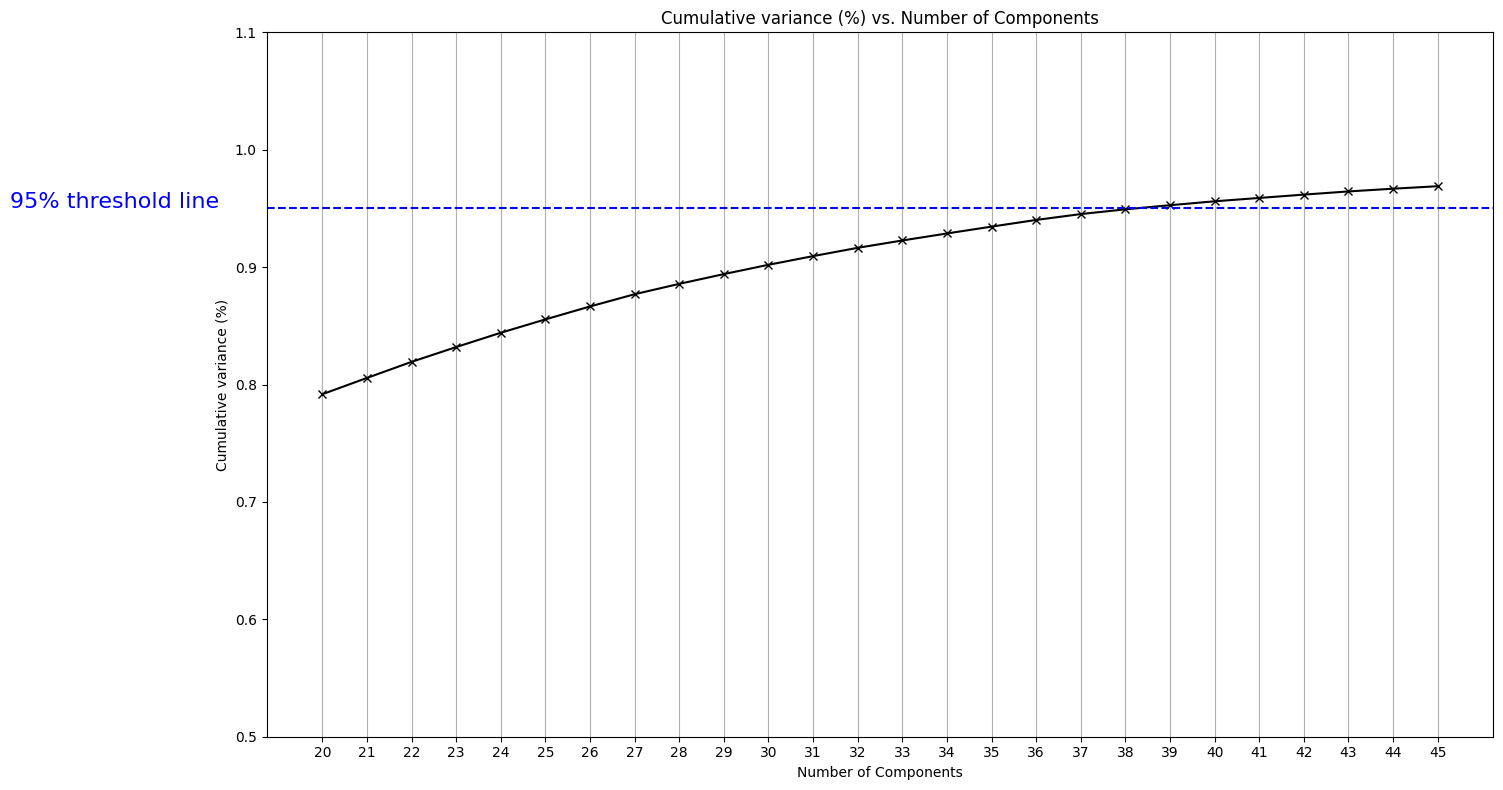

In [34]:
# Plotting the number of components need to explain variance.
# To simplify the visualization, we only displayed between range of components from 20 ~ 45 on the graph.

plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots()
xi = np.arange(20, 46, step=1)
y = cum_variance

plt.ylim(0.5, 1.1)
plt.plot(xi, y, marker='x', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(20, 46, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('Cumulative variance (%) vs. Number of Components')

plt.axhline(y=0.95, color='Blue', linestyle='--')
plt.text(13, 0.95, '95% threshold line', color = 'Blue', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.savefig('PCA_variance.png', dpi=300)
plt.show()

As the graph showed above, when number of components is 38, the 95% cut-off threshold line firstly meet therefore the total explained variance is at approximately 38 components for our 95% PCA model.

In [35]:
#do_PCA = True

# if do_PCA:
#     arr = np.array(df_PCA_transformed)
#     labels = np.array(df['Home-Team-Win']).reshape((-1, 1))
#     arr = np.hstack((arr, labels))
# else:
#     arr = np.array(df_PCA)
#     labels = np.array(df['Home-Team-Win']).reshape((-1, 1))
#     arr = np.hstack((arr, labels))

arr_pca = np.array(df_PCA_transformed)
labels = np.array(df['Home-Team-Win']).reshape((-1, 1))
arr_pca = np.hstack((arr_pca, labels))

arr = np.array(df_PCA)
labels = np.array(df['Home-Team-Win']).reshape((-1, 1))
arr = np.hstack((arr, labels))
# labels added to the end
arr[:5, -5:]

arr_pca[:5, -5:]
# print('no pca')

# print(df_PCA[:1])
# print('pca')

# print(df_PCA_transformed[:1])

array([[-1.16689325,  0.31227328,  2.20809402,  0.08458711,  0.        ],
       [-1.10069669, -0.10046998,  2.59368891,  0.37572415,  0.        ],
       [-2.11560423,  1.44686421,  1.33943656, -0.57230167,  0.        ],
       [-0.38450489, -0.17590614,  2.8177662 ,  3.70994766,  1.        ],
       [ 1.26215408, -0.59250208, -1.48849713,  0.40972285,  1.        ]])

Before running our feedforward / basic neural network, we first split our data into training and test sections, randomized on the basis of date - using a 90/10 split. We also remove the dependent label: the “Home-Team Win” field into a new array to simplify our code. 
We go through these steps for both the PCA and non-PCA datasets.

In [36]:
# randomize data based on dates
rand = arr.copy()
np.random.shuffle(rand)

rand

rand_pca = arr_pca.copy()
np.random.shuffle(rand_pca)


### Model Design #1 - Feed Forward Neural Net

In designing our feedforward neural net, we made several design choices. First, we tested between 2-4 layers of tensorflow’s Dense neurons to see how model performance changed. X layers was the optimal number. Because ReLUs are extremely fast to compute, we choose these as our activation function for initial and intermediary layers, while the output neuron is one with a sigmoid activation function for binary classification.

In [37]:
# remove y label (home team winning)
y = rand[:, -1]
x = np.delete(rand, -1, axis=1)

# import sklearn data test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


#FOR PCA
# remove y label (home team winning)
y_pca = rand_pca[:, -1]
x_pca = np.delete(rand_pca, -1, axis=1)

# import sklearn data test train split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.2)


In [38]:
x_train.shape

(15074, 106)

Once we fitted our dataset on Neural Network model to find the best fit by changing number of layers to 4 with to 2 hidden and changing number of neurons for each layers, it always resulted in the tendency of the training loss to decrease, but the validation loss is significantly greater than the training loss and is increasing, which was a clear sign of <b>over-fitting</b>. Therefore, we decided to incorporate L2 regularization and dropout between each layers to avoid overfitting. As the result, we got that loss vs training loss become closely matches and achieved <b>66% accuracy</b> on our feedforward Neural Network model which was 62% before.

In [39]:
# neural net with on input layer, two hidden layers, and one output layer
# use L2 Regularizer and dropout to reduce over-fitting 
model = models.Sequential([
    layers.Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(x_train.shape[1], )),
    Dropout(0.3),
    layers.Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    # layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               10700     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
#PCA
#  neural net with on input layer, two hidden layers, and one output layer
# use L2 Regularizer and dropout to reduce over-fitting 
modelpca = models.Sequential([
    layers.Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(x_train_pca.shape[1], )),
    Dropout(0.3),
    layers.Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    # layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])
modelpca.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               4000      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 14,201
Trainable params: 14,201
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
losses_data = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=40) #testing purpose, change epochs = 40


Epoch 1/40
472/472 [==============================] - 2s 3ms/step - loss: 1.3072 - acc: 0.6432 - val_loss: 0.7298 - val_acc: 0.6721
Epoch 2/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6732 - acc: 0.6595 - val_loss: 0.6385 - val_acc: 0.6747
Epoch 3/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6450 - acc: 0.6584 - val_loss: 0.6312 - val_acc: 0.6731
Epoch 4/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6407 - acc: 0.6558 - val_loss: 0.6363 - val_acc: 0.6569
Epoch 5/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6409 - acc: 0.6582 - val_loss: 0.6331 - val_acc: 0.6676
Epoch 6/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6418 - acc: 0.6558 - val_loss: 0.6317 - val_acc: 0.6776
Epoch 7/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6408 - acc: 0.6562 - val_loss: 0.6328 - val_acc: 0.6657
Epoch 8/40
472/472 [==============================] - 1s 3ms/step - loss: 0.

In [42]:
modelpca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
losses_data_pca = modelpca.fit(x_train_pca, y_train_pca, validation_data = (x_test_pca, y_test_pca), epochs=40) #testing purpose, change epochs = 40


Epoch 1/40
472/472 [==============================] - 2s 3ms/step - loss: 1.2719 - acc: 0.6349 - val_loss: 0.7900 - val_acc: 0.6660
Epoch 2/40
472/472 [==============================] - 1s 3ms/step - loss: 0.7022 - acc: 0.6572 - val_loss: 0.6491 - val_acc: 0.6670
Epoch 3/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6455 - acc: 0.6615 - val_loss: 0.6329 - val_acc: 0.6721
Epoch 4/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6408 - acc: 0.6601 - val_loss: 0.6304 - val_acc: 0.6699
Epoch 5/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6389 - acc: 0.6602 - val_loss: 0.6292 - val_acc: 0.6694
Epoch 6/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6376 - acc: 0.6623 - val_loss: 0.6282 - val_acc: 0.6654
Epoch 7/40
472/472 [==============================] - 1s 3ms/step - loss: 0.6392 - acc: 0.6606 - val_loss: 0.6282 - val_acc: 0.6683
Epoch 8/40
472/472 [==============================] - 1s 3ms/step - loss: 0.

We run the model with the Adam optimizer and the MSE loss function.  Below  are displayed the loss functions. The loss is the loss of our model on training data, while the val_loss is the loss during cross_validation on testing data. Both iterations suggest similar and relatively minimal loss. 

<Axes: >

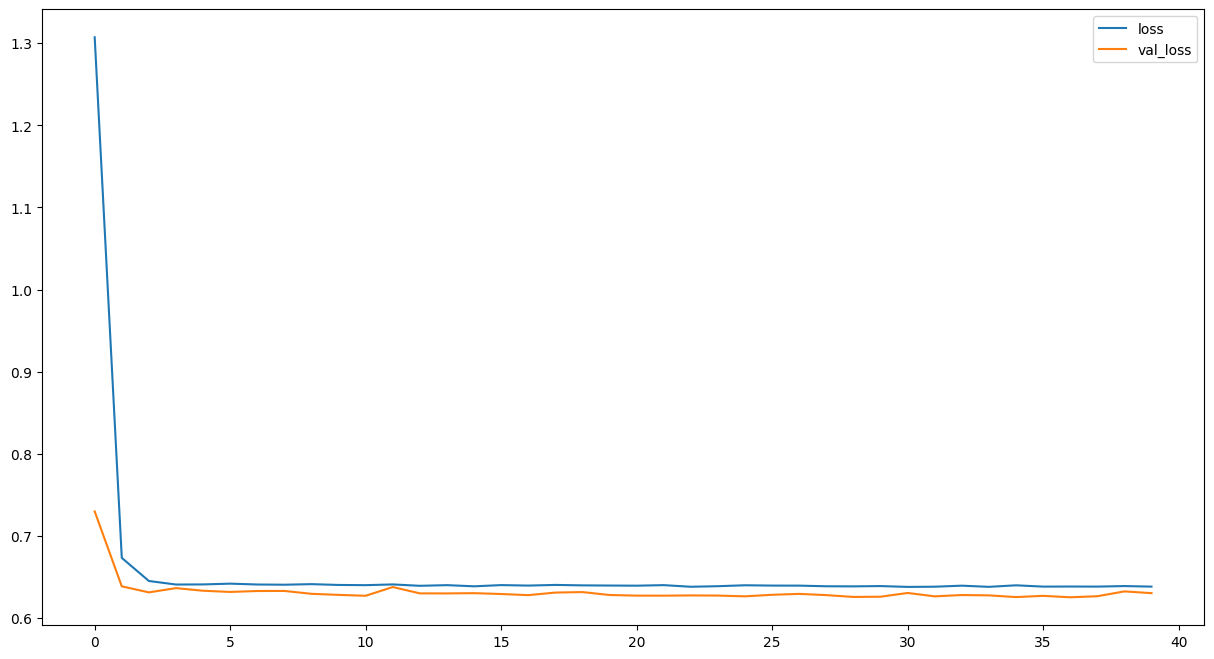

In [43]:
loss = pd.DataFrame(losses_data.history)
loss
loss.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

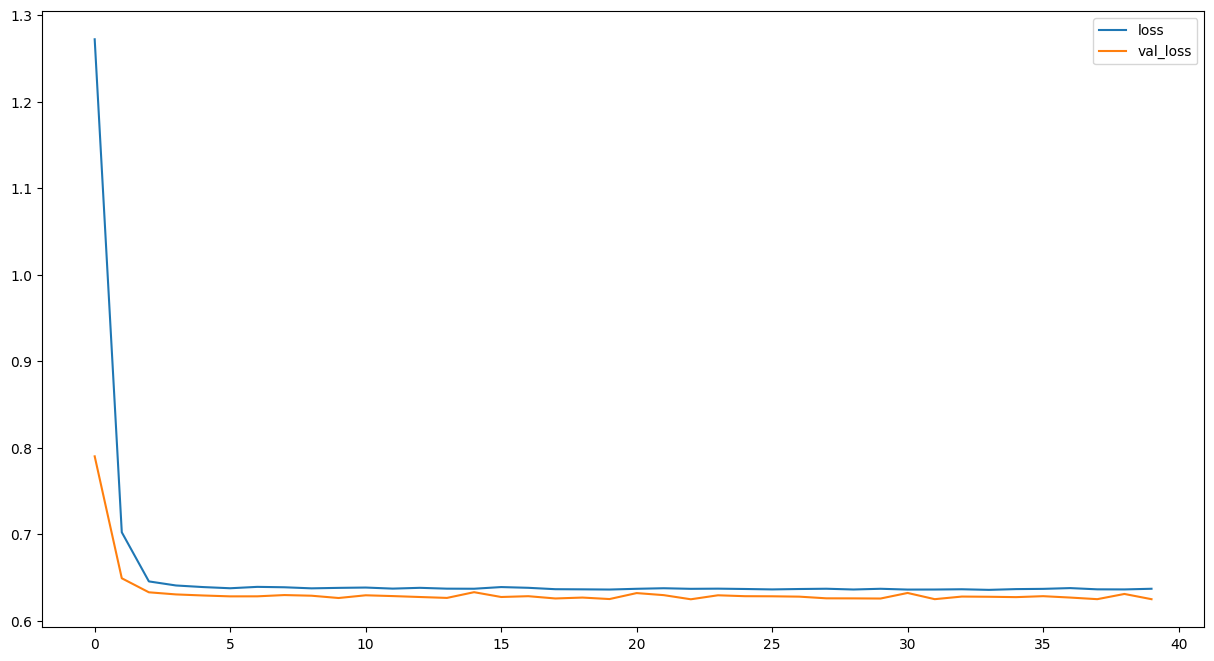

In [44]:
loss_pca = pd.DataFrame(losses_data_pca.history)
loss_pca
loss_pca.loc[:, ['loss', 'val_loss']].plot()

For the non-PCA iteration we also see the following performance metrics:

We see the accuracy score, or the percentage of correctly predicted winners over all games in the dataset. This value of 0.67 suggests the model is relatively adept at correctly classifying winners. 


We can also view the Mean Squared Error (MSE) in this regression context, allowing us to see the average of the squared difference between the predicted and actual outcomes. In this case, the predicted outcome can be the probability of the home team winning the game. The MSE value of 0.33 shows the model is effective at reducing error. 


Below we see the Area Under the Receiver Operating Characteristic Curve (AUC-ROC), commonly used for binary classification problems to measure the performance of the neural network in terms of the trade-off between true positive rate and false positive rate. In this case, the predicted outcome can be the probability of the home team winning the game. Since the AUC value of the ROC curve is relatively close to 1 (with a value of.72), the model is a good classifier. 


118/118 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[ 930  643]
 [ 594 1602]]
F1 Score: 0.72
Accuracy: 0.67
MSE: 0.33
AUC: 0.72


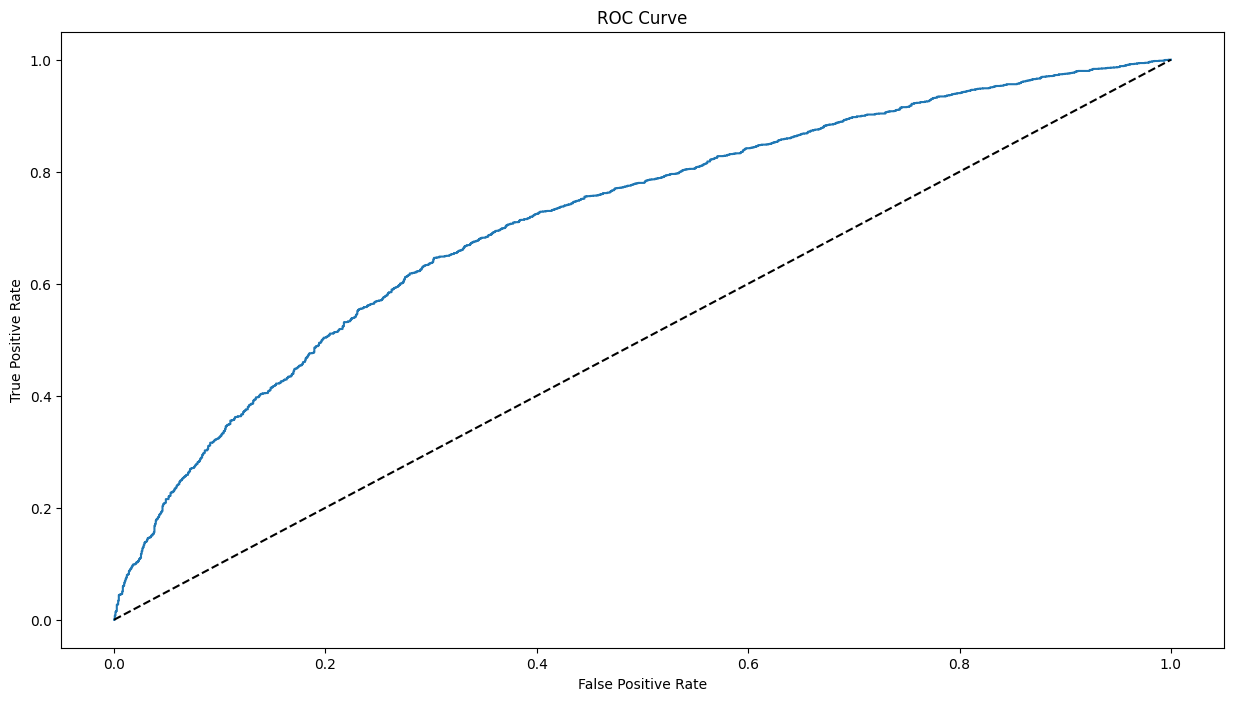

In [45]:
# Calculating F1 score
pred = model.predict(x_test)
binary_pred = (pred > 0.5).astype(np.float32)

conmat = metrics.confusion_matrix(y_test, binary_pred)
print("Confusion Matrix:\n", conmat)

# do accuracy, confusion matrix, F1 score

f1 = metrics.f1_score(y_test, binary_pred)
print("F1 Score: {:.2f}".format(f1))

acc = accuracy_score(y_test, binary_pred)

print("Accuracy: {:.2f}".format(acc))

mse = mean_squared_error(y_test, binary_pred)

print("MSE: {:.2f}".format(mse))

# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# calculate AUC
auc = roc_auc_score(y_test, pred)

print("AUC: {:.2f}".format(auc))

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

118/118 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[ 775  761]
 [ 493 1740]]
F1 Score: 0.74
Accuracy: 0.67
MSE: 0.33
AUC: 0.71


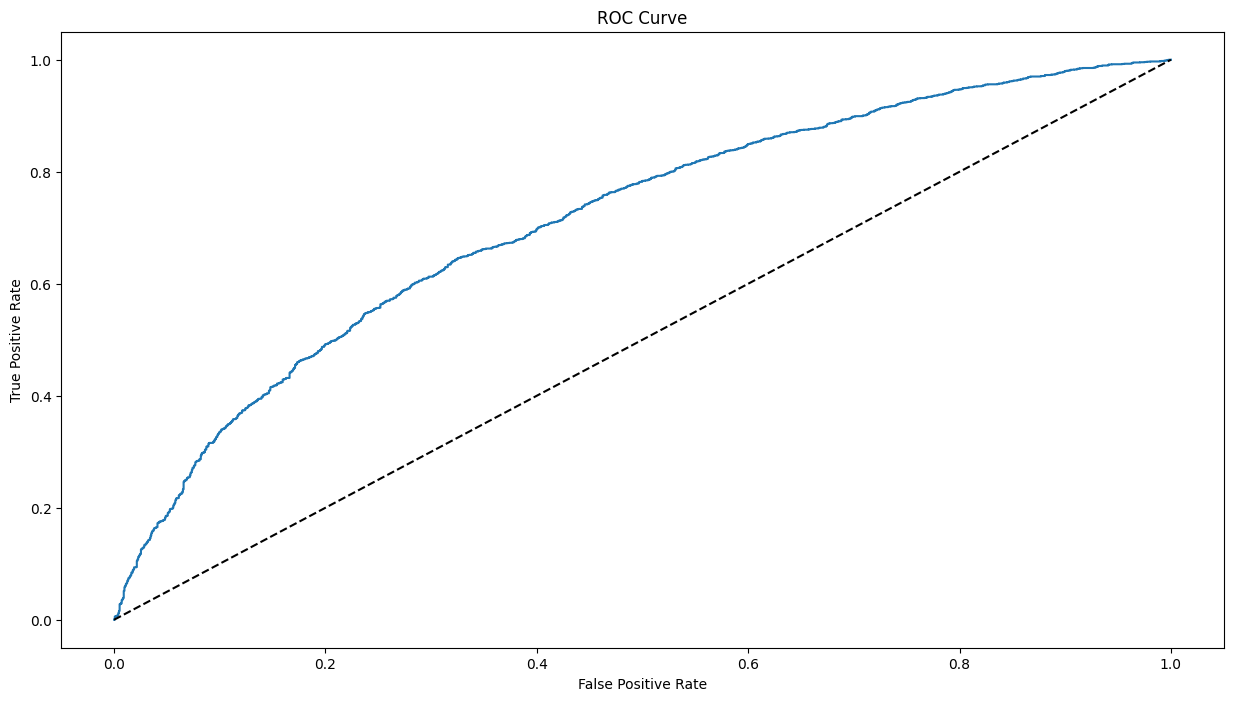

In [47]:
#PCA
# Calculating F1 score
pred = modelpca.predict(x_test_pca)
binary_pred = (pred > 0.5).astype(np.float32)

conmat = metrics.confusion_matrix(y_test_pca, binary_pred)
print("Confusion Matrix:\n", conmat)

# do accuracy, confusion matrix, F1 score

f1 = metrics.f1_score(y_test_pca, binary_pred)
print("F1 Score: {:.2f}".format(f1))

acc = accuracy_score(y_test_pca, binary_pred)

print("Accuracy: {:.2f}".format(acc))

mse = mean_squared_error(y_test_pca, binary_pred)

print("MSE: {:.2f}".format(mse))

# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_pca, pred)

# calculate AUC
auc = roc_auc_score(y_test_pca, pred)

print("AUC: {:.2f}".format(auc))

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

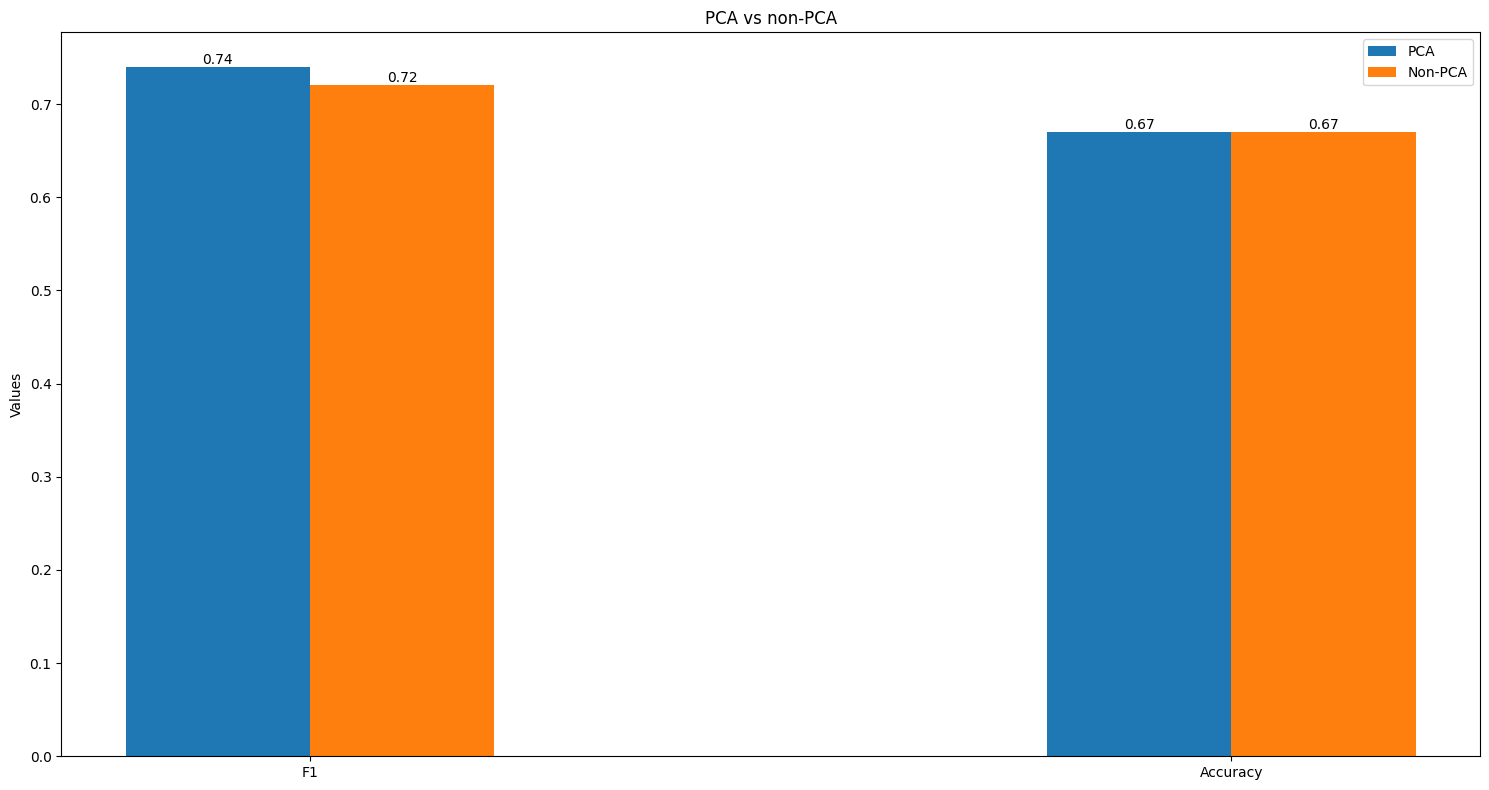

In [57]:

# plot a bar graph of NN
# 0.6479172194215972
acc_non_PCA = 0.67
# 0.7150526089757353
f1_non_PCA = 0.72

# 0.6455293181215176
accPCA = 0.67
# 0.7163481953290871
f1PCA = 0.74

acc = [acc_non_PCA, accPCA]
f1 = [f1_non_PCA, f1PCA]

pca = [f1PCA, accPCA]
no_pca = [f1_non_PCA, acc_non_PCA]


x = np.array([0, 1])
fig, ax = plt.subplots()
bars1 = ax.bar(x - 0.1, pca, .2, label='PCA')
bars2 = ax.bar(x + 0.1, no_pca, .2, label='Non-PCA')

ax.set_ylabel('Values')
ax.set_title('PCA vs non-PCA')
ax.set_xticks(x)
ax.set_xticklabels(['F1', 'Accuracy'])
ax.legend()
fig.tight_layout()
for each in ax.containers:
    ax.bar_label(each)
plt.show() 

Comparing the confusion matrices, we see the model does quite well on bets where the home team wins. The non-PCA version is also relatively efficient at predicting home losses. While the non-PCA iteration is balanced across incorrect and correct home loss predictions, it is slightly more accurate at predicting home wins. The difference in F1 / Accuracy scores is negligible. 

### Model Design #2 - Random Forest

In designing the Random Forest, we tested one main hyperparameter, which was the number of decision trees (n_estimators). After testing four values - 10, 50, 100, and 150 - we decided on using 100 decision trees in our Random Forest. The performance of 100 estimators is shown below in the classification report output and the confusion matrix.

Mean Absolute Error: 0.3406739188113558
Accuracy: 0.6593260811886442
f1: 0.722077922077922
              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56      1573
         1.0       0.69      0.76      0.72      2196

    accuracy                           0.66      3769
   macro avg       0.65      0.64      0.64      3769
weighted avg       0.65      0.66      0.65      3769



<function matplotlib.pyplot.show(close=None, block=None)>

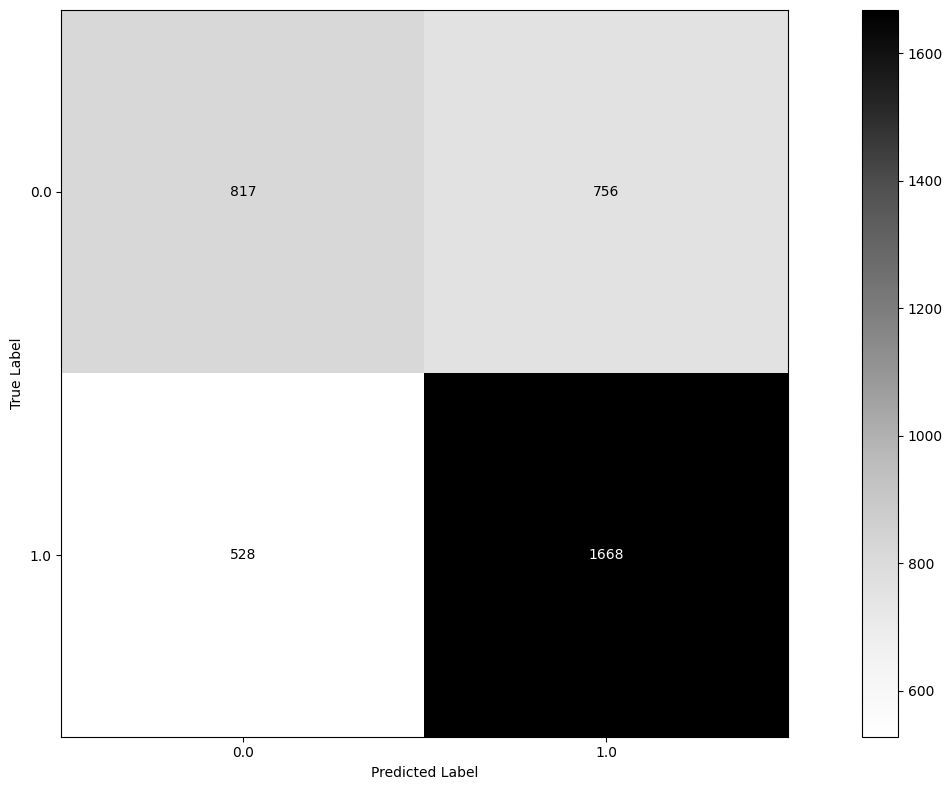

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create the RF Classifier
# still need to tune hyperparameters
model = RandomForestClassifier(n_estimators=100)
loss_RF = model.fit(x_train, y_train)
pred = model.predict(x_test)

mae = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error: {mae}')
acc = accuracy_score(y_test, pred)
print(f'Accuracy: {acc}')

# accuracy for non-PCA = 0.6479172194215972

f1 = metrics.f1_score(y_test, pred)
print(f'f1: {f1}')

# accuracy for non-PCA = 0.6479172194215972
# f1 for non-PCA = 0.7150526089757353

# accuracy for PCA = 0.6455293181215176
# f1 for PCA = 0.7163481953290871

print(metrics.classification_report(y_test, pred))

ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap=plt.cm.Greys)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show


Mean Absolute Error: 0.3512868134783762
Accuracy: 0.6487131865216238
f1: 0.721497686159024
              precision    recall  f1-score   support

         0.0       0.58      0.48      0.52      1536
         1.0       0.68      0.77      0.72      2233

    accuracy                           0.65      3769
   macro avg       0.63      0.62      0.62      3769
weighted avg       0.64      0.65      0.64      3769



<function matplotlib.pyplot.show(close=None, block=None)>

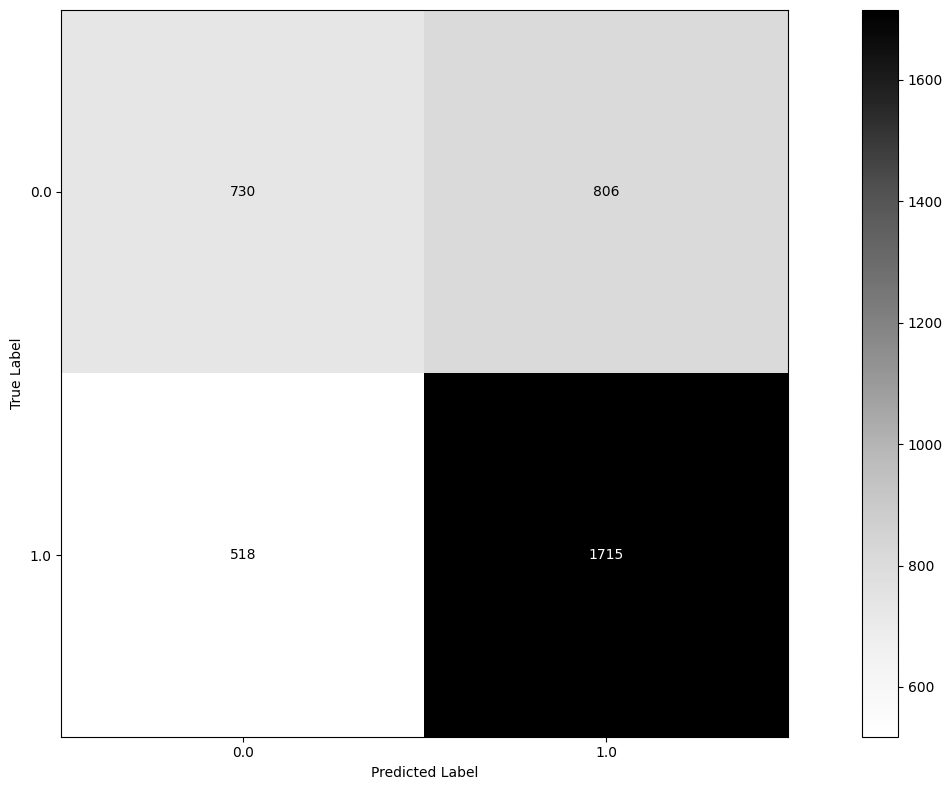

In [50]:
#PCA

# Create the RF Classifier
# still need to tune hyperparameters
model_pca = RandomForestClassifier(n_estimators=100)
loss_RF = model.fit(x_train_pca, y_train_pca)
pred = model.predict(x_test_pca)

mae = mean_absolute_error(y_test_pca, pred)
print(f'Mean Absolute Error: {mae}')
acc = accuracy_score(y_test_pca, pred)
print(f'Accuracy: {acc}')

# accuracy for non-PCA = 0.6479172194215972

f1 = metrics.f1_score(y_test_pca, pred)
print(f'f1: {f1}')

# accuracy for non-PCA = 0.6479172194215972
# f1 for non-PCA = 0.7150526089757353

# accuracy for PCA = 0.6455293181215176
# f1 for PCA = 0.7163481953290871

print(metrics.classification_report(y_test_pca, pred))

ConfusionMatrixDisplay.from_predictions(y_test_pca, pred, cmap=plt.cm.Greys)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show


As seen above in the confusion matrices, the model does quite well on bets where the home team wins. It's much closer to equal - and therefore less helpful - on predicting games where the home team loses. This suggests the random forest model is efficient at predicting home team wins but not losses. In fact, the PCA iteration incorrectly predicts home losses more than half of the time.

#### Performance of various numbers of estimators

Below is a comparison of the performance of the different number of estimators we tested for Random Forest.

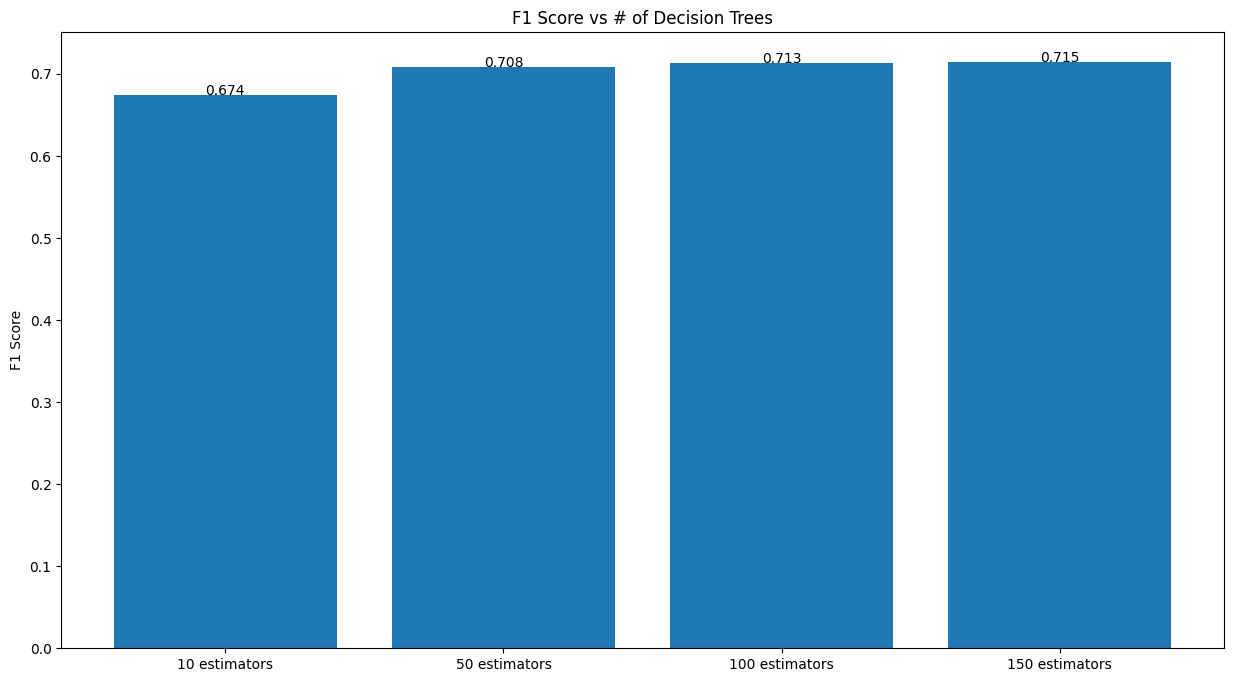

In [51]:
ten_est = .674
fifty_est = .708
hundred_est =.713
onefifty_est = .715

labels = ['10 estimators', '50 estimators', '100 estimators', '150 estimators']
vals = [ten_est, fifty_est, hundred_est, onefifty_est]
plt.bar(labels, vals)
plt.ylabel('F1 Score')
plt.title('F1 Score vs # of Decision Trees')

for i in range(len(labels)):
    plt.text(i, vals[i], vals[i], ha= 'center')

plt.show()

Because the performance doesn't increase by much from 100 to 150 estimators, and we want to maintain a relively fast training time, we choose 100 estimators as our value for the number of decision trees in our model. Let's now see if PCA makes a difference.

Overall, a 0.713 F1 score for a sports betting model is quite good. While the model isn't at super high value, we're only trying to gain an edge on the other bettors, so this is a good outcome. Ideally, we'd place thousands of bets to reduce the variance using this model and evaluate the performance over those bets.

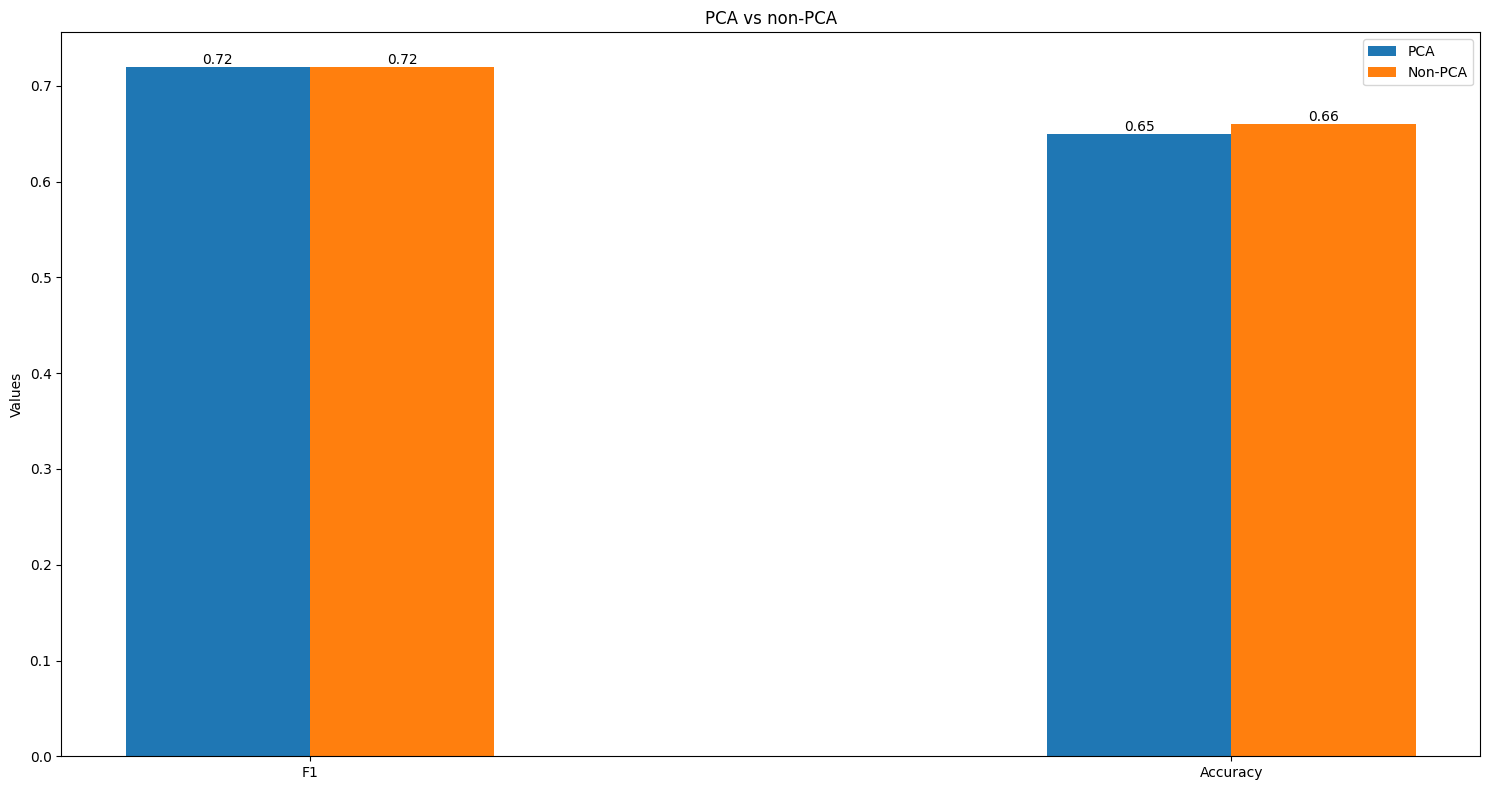

In [58]:
# plot a bar graph of Random forest 
# 0.6479172194215972
acc_non_PCA = 0.66
# 0.7150526089757353
f1_non_PCA = 0.72

# 0.6455293181215176
accPCA = 0.65
# 0.7163481953290871
f1PCA = 0.72

acc = [acc_non_PCA, accPCA]
f1 = [f1_non_PCA, f1PCA]

pca = [f1PCA, accPCA]
no_pca = [f1_non_PCA, acc_non_PCA]


x = np.array([0, 1])
fig, ax = plt.subplots()
bars1 = ax.bar(x - 0.1, pca, .2, label='PCA')
bars2 = ax.bar(x + 0.1, no_pca, .2, label='Non-PCA')

ax.set_ylabel('Values')
ax.set_title('PCA vs non-PCA')
ax.set_xticks(x)
ax.set_xticklabels(['F1', 'Accuracy'])
ax.legend()
fig.tight_layout()
for each in ax.containers:
    ax.bar_label(each)
plt.show() 

#### PCA vs no PCA

As seen above, PCA minimally affects the performance of the RF model. This likely makes sense given we need 39 features after PCA to reach a 95% variance explained threshold, so a linear combination of features doesn't help us much. Let's stick without using PCA as the model performs better and we don't run into any performance issues.

### Logistic Regression

We now run a logistic regression for both PCA and non-PCA datasets. In order to allow non-PCA model to converge, we needed to increase max iterations to 1000. 

Mean Absolute Error: 0.333510214911117
f1: 0.7328374070138152
              precision    recall  f1-score   support

         0.0       0.63      0.50      0.56      1573
         1.0       0.69      0.79      0.73      2196

    accuracy                           0.67      3769
   macro avg       0.66      0.64      0.64      3769
weighted avg       0.66      0.67      0.66      3769



<function matplotlib.pyplot.show(close=None, block=None)>

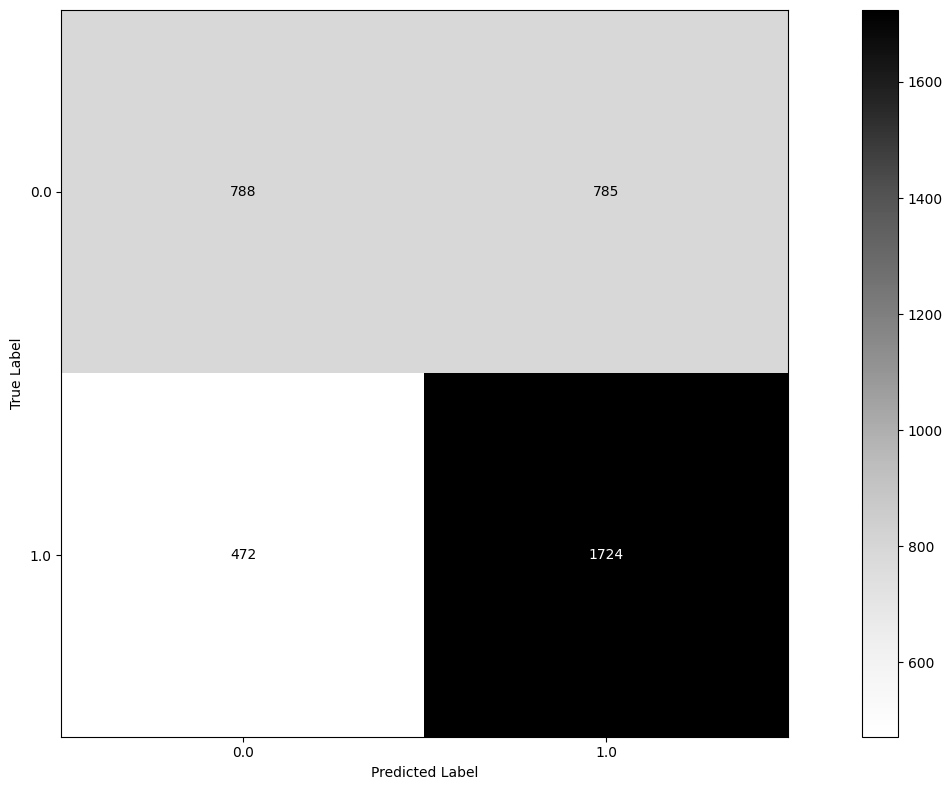

In [55]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
#non-PCA logistic regression fails to converge w standard iterations
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the F1 score
f1 = metrics.f1_score(y_test, pred)
print(f'f1: {f1}')

print(metrics.classification_report(y_test, pred))

ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap=plt.cm.Greys)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show


Mean Absolute Error: 0.3345715043778191
f1: 0.7369079908199458
              precision    recall  f1-score   support

         0.0       0.61      0.48      0.54      1536
         1.0       0.69      0.79      0.74      2233

    accuracy                           0.67      3769
   macro avg       0.65      0.64      0.64      3769
weighted avg       0.66      0.67      0.66      3769



<function matplotlib.pyplot.show(close=None, block=None)>

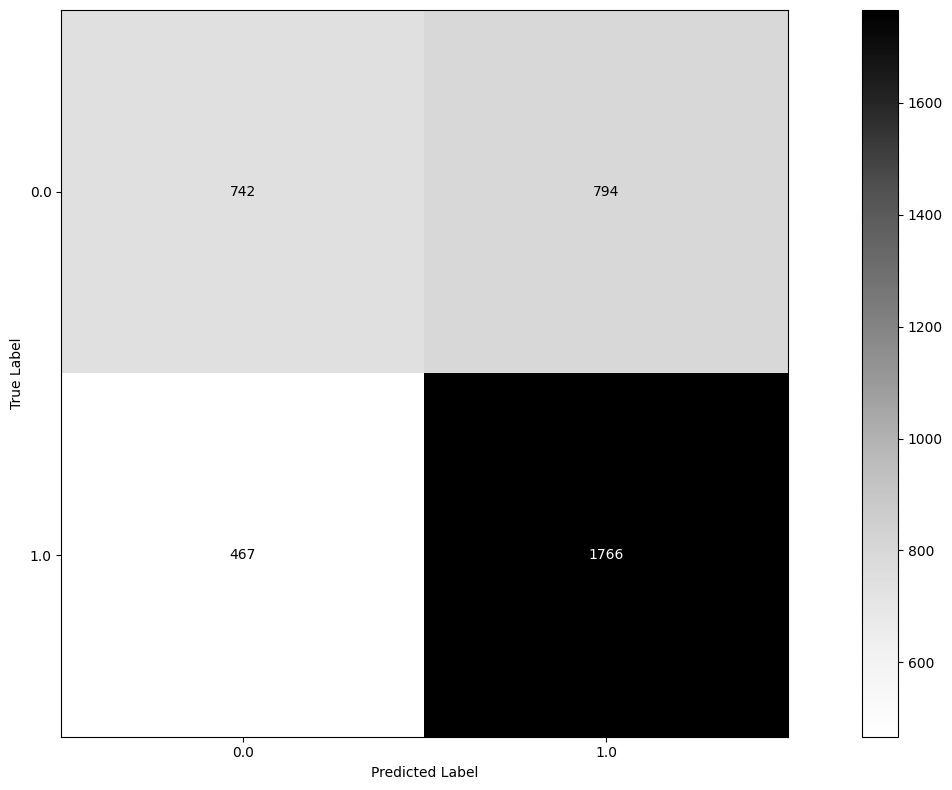

In [54]:
#PCA
#from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(x_train_pca, y_train_pca)
pred = model.predict(x_test_pca)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test_pca, pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the F1 score
f1 = metrics.f1_score(y_test_pca, pred)
print(f'f1: {f1}')

print(metrics.classification_report(y_test_pca, pred))

ConfusionMatrixDisplay.from_predictions(y_test_pca, pred, cmap=plt.cm.Greys)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show


As seen for Random Forest, Confusion matrices suggest the model does quite well on bets where the home team wins. It incorrectly predicts home team losses about half of the time. Again, the PCA iteration is slightly worse at predicting home losses more than half of the time.

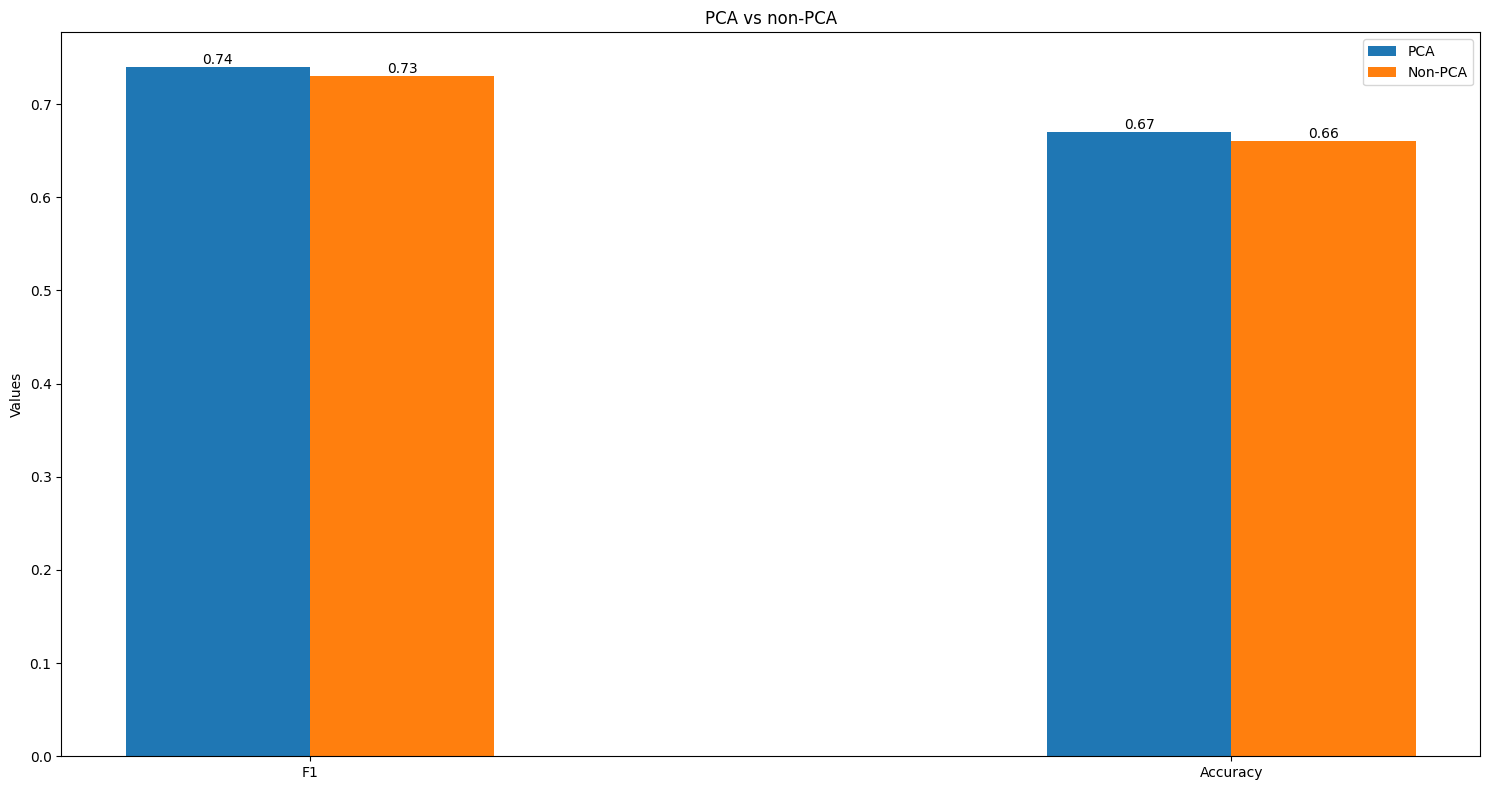

In [59]:
# plot a bar graph of Logistic regression 
# 0.6479172194215972
acc_non_PCA = 0.66
# 0.7150526089757353
f1_non_PCA = 0.73

# 0.6455293181215176
accPCA = 0.67
# 0.7163481953290871
f1PCA = 0.74

acc = [acc_non_PCA, accPCA]
f1 = [f1_non_PCA, f1PCA]

pca = [f1PCA, accPCA]
no_pca = [f1_non_PCA, acc_non_PCA]


x = np.array([0, 1])
fig, ax = plt.subplots()
bars1 = ax.bar(x - 0.1, pca, .2, label='PCA')
bars2 = ax.bar(x + 0.1, no_pca, .2, label='Non-PCA')

ax.set_ylabel('Values')
ax.set_title('PCA vs non-PCA - Logistic Reg')
ax.set_xticks(x)
ax.set_xticklabels(['F1', 'Accuracy'])
ax.legend()
fig.tight_layout()
for each in ax.containers:
    ax.bar_label(each)
plt.show() 

Again, comparing performance measures for PCA vs non-PCA, the logistic regression suggests nearly identical performance as the F1 scores and accuracy differ by no more than 0.01.

## Discussion
### PCA
As seen in each of the PCA comparison graphs, PCA had very little to no improvement on the output of our models. This is because much of our explained variance is spread out across each of the features and was not highly dependent on a particular few. This is the case for feedforward Neural Network (NN), Random Forest (RF), and Logistic Regression (LR). In fact, there was only one case (NN F1 Score) where the values differed by more than 0.01 across iterations - 0.74 for PCA and 0.72 for non-PCA. We do find it interesting, however, that the PCA models were generally slightly less effective at predicting home losses. Furthermore, comparison of the Confusion Matrices suggests that PCA exclusion is impactful in predicting the victor when the away team wins. Across each model type, we consistently recognize reduced accuracy at predicting away team wins, at the cost of slightly improving home team wins. This effect was most signficant for the feedforward neural network - roughly 20% more correct predictions of home team losses, versus ~5-10%  improvement for logistic regression and random forest respectively. 

### Model Comparison
We see that performance is relatively similar across each of our three models, both with and without the inclusion of PCA. In general, the neural network and logistic regression slightly outperform the random forest, yet all three yielded performance metrics in a similar range. Considering the most efficient model of PCA vs non PCA we see F1 Scores for NN, RF, and LR that are 0.74, 0.72 and 0.74 respectively. For accuracy they are 0.67, 0.66, 0.67.
Considering these are sports betting models, our accuracy scores suggest signicant model accuracy - the goal is to have enough relative insight so as to generate consistent average returns. Evaluating more refined sports prediction models, we see typical accuracy ranging from 70-75%. Cross-referencing with our own models' efficiency, we see that there is some room to improve their predictive capability.  



## Conclusion

As stated above, our models are generally accurate in predicting the winner of an NBA match. We do find it interesting, however, that the predictive capability of home wins is generally sound, whereas home losses are more difficult to forecast. In fact, only the non-PCA feedforward Neural Network was able to consistently correct predict home losses. This is interesting - perhaps the value of home team advantage should be diminished in future model setup. 

### Future Iterations
Currently, our models suggest the winner of a given game. It would be interesting and relevant to explore the model's predictions over the course of a standard 7-game NBA playoff series where factors such as home team advantage, momentum, and player attributes might factor in more significantly. Additionally, we can work in a streak predictor (in the regular season) to our models so as to quantify the impact of momentum on likelihood of winning. As cited in our reference materials, some models considering the aggregate of player statistics on a given roster to predict team performance. In our models' current state team-level information is only considered. We infer that the inclusion of player-level data may allow our models to approach an accuracy threshold indicative of the gold standard in modern sports betting algorithms.

## Technical Contributions
-----
A contribution table below shows all team members' names that explicitly provides the contribution of each member in preparing the project proposal.

<table>
  <thead>
    <tr>
      <th>Name</th>
      <th>Data Cleaning</th>
      <th>PCA</th>
      <th>Neural Net</th>
      <th>Random Forest</th>
      <th>Logistic Regression</th>
      <th>Discussion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Spencer Kim</td>
      <td></td>
      <td></td>
      <td>tuned model parameters to improve performance.</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td>Alfonso Garcia</td>
      <td>added new variables and removed unneccessary fields</td>
      <td></td>
      <td>evaluated PCA vs non-PCA</td>
      <td>evaluated PCA vs non-PCA</td>
      <td>ensured model convergence. evaluated PCA vs non-PCA</td>
      <td>total comparison across models</td>
    </tr>
    <tr>
      <td>Brett Graybill</td>
      <td></td>
      <td>Drafted and completed the PCA for the interim report.</td>
      <td></td>
      <td>Created and validated RF model. Tuned n_estimators as hyperparameter. Tested with and without PCA and discussed implications of RF's F1 score. </td>
      <td></td>
      <td>Discussed the performance of RF model in relation to the others.</td>
    </tr>
    <tr>
      <td>Seungmi Lee</td>
      <td></td>
      <td>visualize the cumulative variance vs. number of components</td>
      <td>Adding regularization to Neural Netwok to avoid overfitiing on our training set</td>
      <td>plotted confusion matrix for Random Forest </td>
      <td>plotted confusion matrix for Random Forest</td>
      <td></td>
    </tr>
    <tr>
      <td>Rohan Misra</td>
      <td>added new variables and removed unneccessary fields</td>
      <td></td>
      <td>evaluated PCA vs non-PCA</td>
      <td>evaluated PCA vs non-PCA</td>
      <td>ensured model convergence. evaluated PCA vs non-PCA</td>
      <td>total comparison across models</td>
    </tr>
  </tbody>
</table>
